## Данные

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn import base
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from tqdm import tqdm

from sklearn.pipeline import Pipeline


In [2]:
import lightgbm as lgb

In [3]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import GridSearchCV
#from sklearn.externals import joblib

In [4]:
!pip install optuna
import optuna

### Contract

In [5]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
display(contract.head(10))
contract.shape

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


(7043, 8)

In [6]:
contract['customerID'].duplicated().sum()

0

In [7]:
contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [8]:
contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [9]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


### Personal

In [10]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')
display(personal.head(10))
personal.shape

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


(7043, 5)

In [11]:
personal['customerID'].duplicated().sum()

0

In [12]:
personal['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
personal['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [14]:
personal['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [15]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### internet

In [16]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')
display(internet.head(10))
internet.shape

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


(5517, 8)

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [18]:
internet['customerID'].duplicated().sum()

0

In [19]:
for i in internet.drop(['customerID'], axis = 1).columns:
    print(i)
    print(internet[i].value_counts())
    print('____________________________')

InternetService
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64
____________________________
OnlineSecurity
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64
____________________________
OnlineBackup
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
____________________________
DeviceProtection
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
____________________________
TechSupport
No     3473
Yes    2044
Name: TechSupport, dtype: int64
____________________________
StreamingTV
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
____________________________
StreamingMovies
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64
____________________________


### Phone

In [20]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')
display(phone.head(10))
phone.shape

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


(6361, 2)

In [21]:
phone['customerID'].duplicated().sum()

0

In [22]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


## Подготовка данных

### Contract

In [23]:
contract.head(1)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [24]:
contract['exited'] = contract.apply(lambda x: 0 if x['EndDate']== 'No' else 1, axis=1) 

In [25]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
contract['BeginDate'] = pd.to_datetime(
    contract['BeginDate'], format='%Y-%m-%d'
)


In [27]:
#Информация о договорах актуальна на 1 февраля 2020.
contract['current_date']='2020-02-01'
contract['current_date'] = pd.to_datetime(
    contract['current_date'], format='%Y-%m-%d'
)

In [28]:
contract['day']=contract['current_date']-contract['BeginDate']

In [29]:
contract['day']=contract['day'].dt.days

In [30]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited,current_date,day
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,2020-02-01,123
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,2020-02-01,153


In [31]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   exited            7043 non-null   int64         
 9   current_date      7043 non-null   datetime64[ns]
 10  day               7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 605.4+ KB


In [32]:
contract['TotalCharges']=contract['TotalCharges'].astype('str')

In [33]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [34]:
contract.head(1)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited,current_date,day
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,31


In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   exited            7043 non-null   int64         
 9   current_date      7043 non-null   datetime64[ns]
 10  day               7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 605.4+ KB


In [36]:
contract=contract.dropna()
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   exited            7032 non-null   int64         
 9   current_date      7032 non-null   datetime64[ns]
 10  day               7032 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 659.2+ KB


### Объединение данных

In [37]:
df_all=(
    contract.merge(personal, on='customerID', how='left').
merge(internet, on='customerID', how='left').
merge(phone, on='customerID', how='left')
)

In [38]:
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited,current_date,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,2020-02-01,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,2020-02-01,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,2020-02-01,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   exited            7032 non-null   int64         
 9   current_date      7032 non-null   datetime64[ns]
 10  day               7032 non-null   int64         
 11  gender            7032 non-null   object        
 12  SeniorCitizen     7032 non-null   int64         
 13  Partner           7032 non-null   object        
 14  Dependents        7032 n

In [40]:
df_all.isna().sum().sum()

11320

In [41]:
df_all=df_all.fillna('No')

In [42]:
df_all.isna().sum().sum()

0

## Анализ

### Анализ персональных характеристик

#### Влияние пола на отток

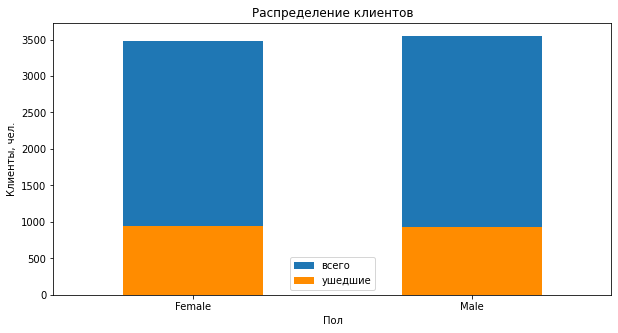

In [43]:
ax=df_all.groupby('gender')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('gender')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Пол', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [44]:
df_all.groupby('gender')['exited'].agg('mean')

gender
Female    0.269595
Male      0.262046
Name: exited, dtype: float64

#### Партнер и отток

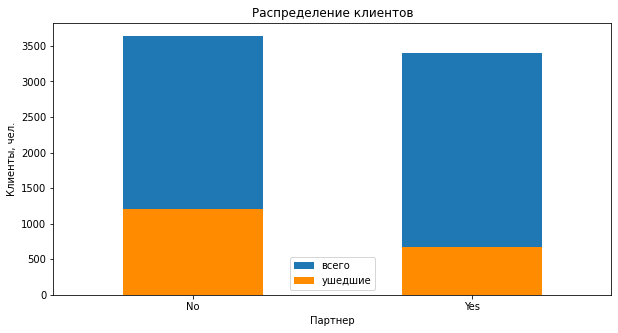

In [45]:
ax=df_all.groupby('Partner')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('Partner')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Партнер', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [46]:
df_all.groupby('Partner')['exited'].agg('mean')

Partner
No     0.329761
Yes    0.197171
Name: exited, dtype: float64

#### Иждивенцы и отток

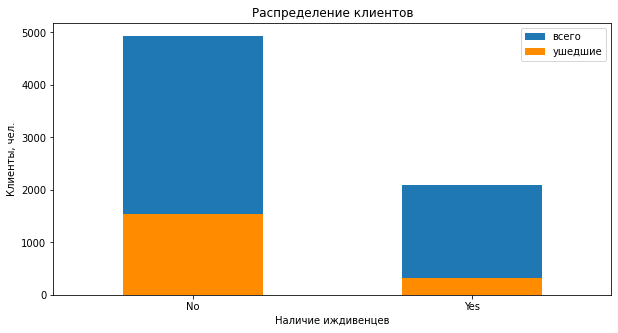

In [47]:
ax=df_all.groupby('Dependents')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('Dependents')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Наличие иждивенцев', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [48]:
df_all.groupby('Dependents')['exited'].agg('mean')

Dependents
No     0.312791
Yes    0.155312
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- У клиентов при наличии иждивенцев отток НИЖЕ в 2 раза, чем у клиентов с их отсутствием.    
 
</div>

#### Возраст и отток

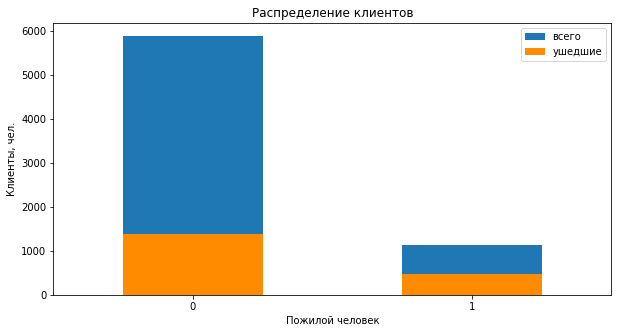

In [49]:
ax=df_all.groupby('SeniorCitizen')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('SeniorCitizen')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Пожилой человек', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [50]:
df_all.groupby('SeniorCitizen')['exited'].agg('mean')

SeniorCitizen
0    0.236503
1    0.416813
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Пожилые клиенты уходят почти в 2 раза чаще.    
 
</div>

#### Тип договора и отток

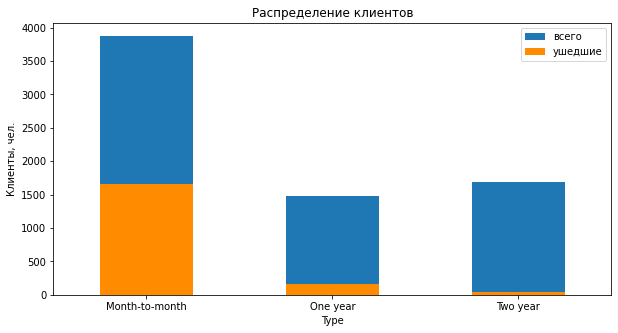

In [51]:
ax=df_all.groupby('Type')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('Type')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Type', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [52]:
df_all.groupby('Type')['exited'].agg('mean')

Type
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Высокий отток при договоре на месяц, почти в 4 раза меньше - при договоре на год, а на 2 года - в 20 раз меньше    
 
</div>

#### Безбумажное выставление счетов и отток

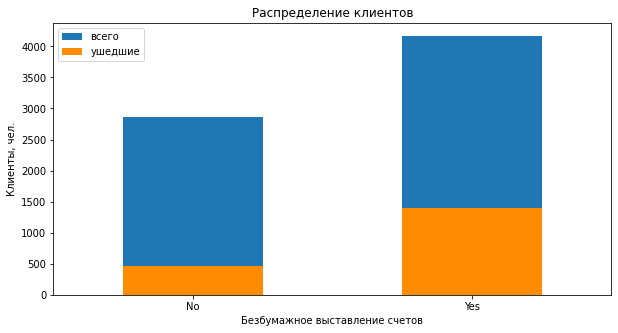

In [53]:
ax=df_all.groupby('PaperlessBilling')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('PaperlessBilling')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Безбумажное выставление счетов', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [54]:
df_all.groupby('PaperlessBilling')['exited'].agg('mean')

PaperlessBilling
No     0.163757
Yes    0.335893
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- При безбумажном выставлении счетов отток в 2 раза выше.  
 
</div>

#### Метод оплаты и отток

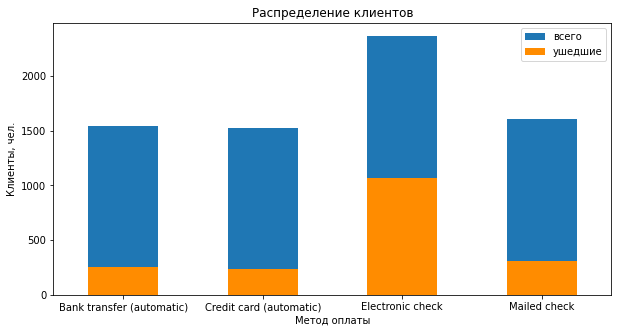

In [55]:
ax=df_all.groupby('PaymentMethod')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('PaymentMethod')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Метод оплаты', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [56]:
df_all.groupby('PaymentMethod')['exited'].agg('mean')

PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Отток в 2-3 раза выше Electronic check
 
</div>

### Анализ телефонии

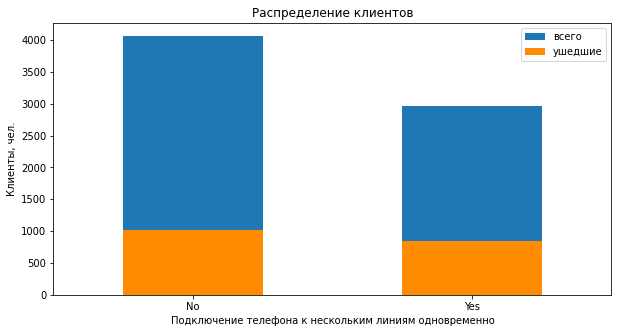

In [57]:
ax=df_all.groupby('MultipleLines')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('MultipleLines')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Подключение телефона к нескольким линиям одновременно', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [58]:
df_all.groupby('MultipleLines')['exited'].agg('mean')

MultipleLines
No     0.250677
Yes    0.286485
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Услуга связанная с телефоном или ее отсутствие на первый взгляд не имеет значимого влияния на отток.
 
</div>

### Анализ интернета

<div class="alert alert-info"> <b> </b>   

Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).     
    
**Также доступны такие услуги:**
    
- Интернет-безопасность: антивирус **(DeviceProtection)** и блокировка небезопасных сайтов **(OnlineSecurity)**;
    
- Выделенная линия технической поддержки **(TechSupport)**;
    
- Облачное хранилище файлов для резервного копирования данных **(OnlineBackup)**;
    
- Стриминговое телевидение **(StreamingTV)** и каталог фильмов **(StreamingMovies)**.

</div>

#### Способ подключения интернета или его отсутствие (InternetService)

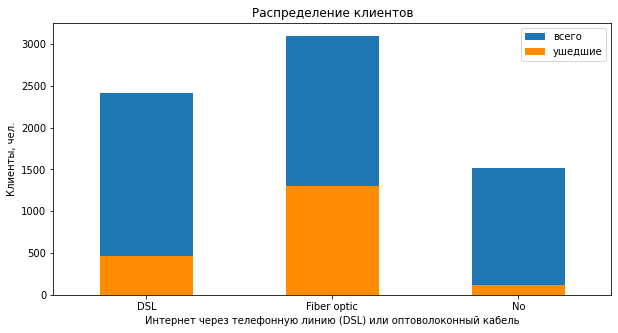

In [59]:
ax=df_all.groupby('InternetService')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('InternetService')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Интернет через телефонную линию (DSL) или оптоволоконный кабель', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [60]:
df_all.groupby('InternetService')['exited'].agg('mean')

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Способ подключения интернета и отсутствие услуги влияет на отток. 
    
- Подключение через телефонную линию (DSL) - отток 19%, через оптоволоконный кабель (*Fiber optic*) - 42%, при отсутствии интернета отток - 7,4%.  
</div>

#### Антивирус (DeviceProtection)

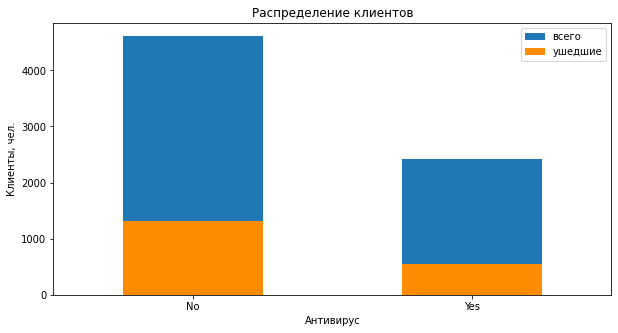

In [61]:
ax=df_all.groupby('DeviceProtection')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('DeviceProtection')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Антивирус', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [62]:
df_all.groupby('DeviceProtection')['exited'].agg('mean')

DeviceProtection
No     0.286953
Yes    0.225393
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Наличие антивируса и отсутствие услуги влияет на отток. 
    
- При наличии услуги отток меньше.
</div>

#### Блокировка небезопасных сайтов (OnlineSecurity)

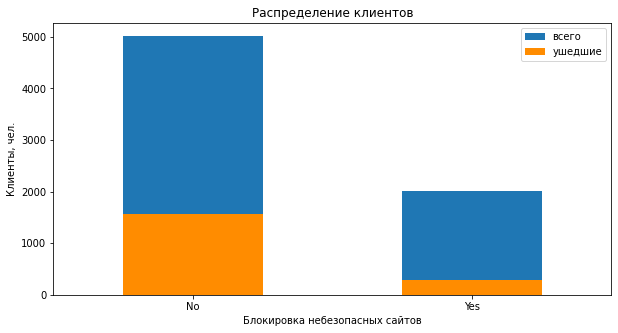

In [63]:
ax=df_all.groupby('OnlineSecurity')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('OnlineSecurity')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Блокировка небезопасных сайтов', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [64]:
df_all.groupby('OnlineSecurity')['exited'].agg('mean')

OnlineSecurity
No     0.313733
Yes    0.146402
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Наличие блокировки и отсутствие услуги влияет на отток. 
    
- При наличии услуги отток меньше.
    
</div>

#### Техническая поддержка (TechSupport)

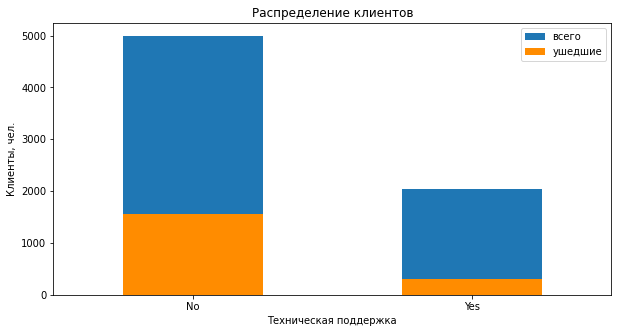

In [65]:
ax=df_all.groupby('TechSupport')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('TechSupport')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Техническая поддержка', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [66]:
df_all.groupby('TechSupport')['exited'].agg('mean')

TechSupport
No     0.312300
Yes    0.151961
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Наличие техподдержки и отсутствие услуги влияет на отток. 
    
- При наличии услуги отток в 2 раза меньше.
    
</div>

#### Облачное хранилище файлов (OnlineBackup)

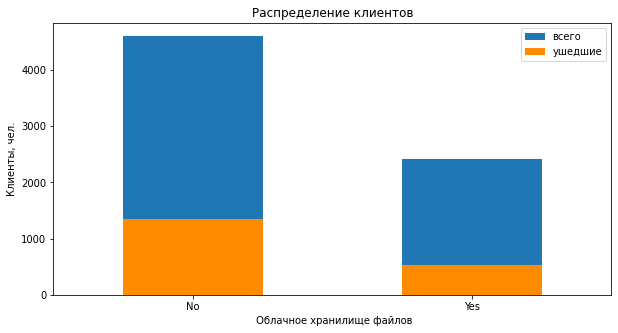

In [67]:
ax=df_all.groupby('OnlineBackup')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('OnlineBackup')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel=' Облачное хранилище файлов', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [68]:
df_all.groupby('OnlineBackup')['exited'].agg('mean')

OnlineBackup
No     0.292164
Yes    0.215670
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- Наличие облачного хранилища и отсутствие услуги влияет на отток. 
    
- При наличии услуги отток меньше.
    
</div>

#### Стриминговое телевидение (StreamingTV)

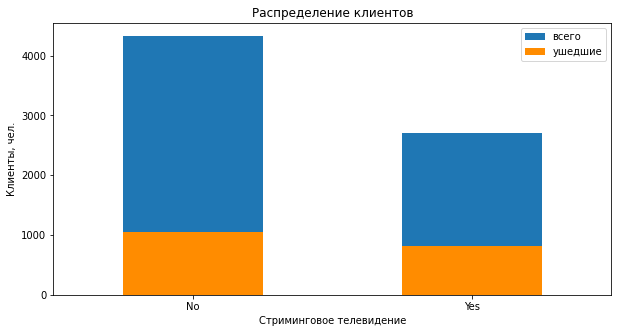

In [69]:
ax=df_all.groupby('StreamingTV')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('StreamingTV')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Стриминговое телевидение', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [70]:
df_all.groupby('StreamingTV')['exited'].agg('mean')

StreamingTV
No     0.243705
Yes    0.301147
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- При наличии услуги отток больше.
    
</div>

#### Каталог фильмов (StreamingMovies)

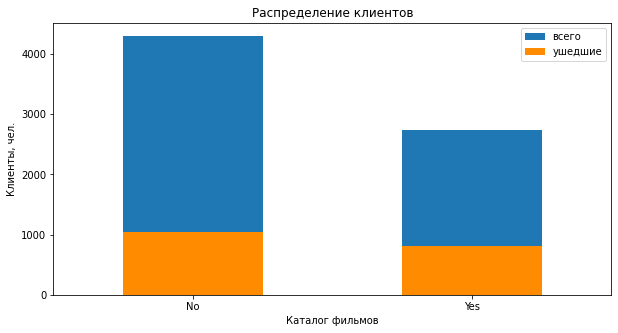

In [71]:
ax=df_all.groupby('StreamingMovies')['exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df_all.groupby('StreamingMovies')['exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Каталог фильмов', ylabel='Клиенты, чел.', title='Распределение клиентов')
ax.legend(['всего', 'ушедшие']);

In [72]:
df_all.groupby('StreamingMovies')['exited'].agg('mean')

StreamingMovies
No     0.244362
Yes    0.299524
Name: exited, dtype: float64

<div class="alert alert-info"> <b> </b>      
   
    
- При наличии услуги отток больше.
    
</div>

### Анализ взносов

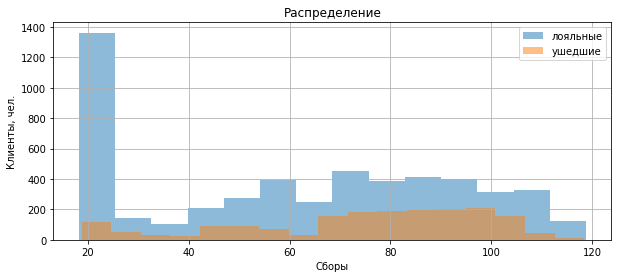

In [73]:
_, ax = df_all.groupby('exited')['MonthlyCharges'].hist(bins='fd', figsize=(10,4), alpha=0.5);
ax.set(xlabel='Сборы', ylabel='Клиенты, чел.', title='Распределение')
ax.legend(['лояльные', 'ушедшие']);

In [74]:
df_all.query('MonthlyCharges<23')['exited'].mean()

0.08721422523285352

In [75]:
df_all.query('MonthlyCharges>=70')['exited'].mean()

0.3549735302312622

In [76]:
df_all.query('MonthlyCharges<70')['exited'].mean()

0.1728144060412431

In [77]:
df_all.query('MonthlyCharges>=23')['exited'].mean()

0.301828747222697

<div class="alert alert-info"> <b> </b>       
    
- С ежемесячной оплатой меньше 70 уходят 17% абонентов, с оплатой более 70 - 35,5%.      
    
- С ежемесячной оплатой меньше 23 уходят 8,7% абонентов, с оплатой более 23 - 30,2%.   
</div>

In [78]:
df_all.groupby('exited')['MonthlyCharges'].agg(['mean','median'])

,mean,median
exited,,
0,61.307408,64.45
1,74.441332,79.65


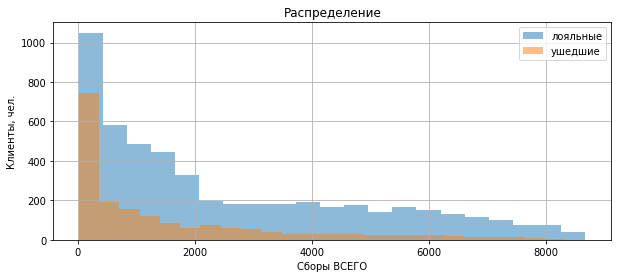

In [79]:
_, ax = df_all.groupby('exited')['TotalCharges'].hist(bins='fd', figsize=(10,4), alpha=0.5);
ax.set(xlabel='Сборы ВСЕГО', ylabel='Клиенты, чел.', title='Распределение')
ax.legend(['лояльные', 'ушедшие']);

In [80]:
df_all.groupby('exited')['TotalCharges'].agg(['mean','median'])

,mean,median
exited,,
0,2555.344141,1683.60
1,1531.796094,703.55


<div class="alert alert-info"> <b> </b>   
    
**Здесь ситуация обратная месячным сборам**   
    
- У клиентов, которые остаются выше средний и медианный итоговый сбор  
    
- Величина сбора зависит от продолжительности пользования сервисов, т.е. чем дольше абонент с провайдером, тем меньше вероятность его ухода.
</div>

#### Стат.тест средних взносов

In [81]:
def test(set1, set2):
    alpha = 0.05    
    result = st.ttest_ind(set1, set2, equal_var=False) #equal_var=False, т.к.тест Уэлча

    print ('Тест на равенство средних:')
    print ('P-значение:', result.pvalue)

    if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

def utest (set1, set2):
    alpha = 0.05
    result = st.mannwhitneyu (set1, set2) 

    print ('Тест на равенство распределений:')
    print ('P-значение:', result.pvalue)

    if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

<div class="alert alert-info"> <b> </b>   
    
Оба распределения далеки от нормального, поэтому применим t-тест для проверки нулевой гипотезы о равенстве среднего сбора двух групп, а затем проверим гипотезу о равенстве распределений с помощью непараметрического u-теста
    
</div>

In [82]:
test(df_all.query('exited == 1')['MonthlyCharges'], df_all.query('exited == 0')['MonthlyCharges'])

Тест на равенство средних:
P-значение: 2.657357144516026e-72
Отвергаем нулевую гипотезу


In [83]:
utest(df_all.query('exited == 1')['MonthlyCharges'], df_all.query('exited == 0')['MonthlyCharges'])

Тест на равенство распределений:
P-значение: 8.467195044548749e-54
Отвергаем нулевую гипотезу


In [84]:
test(df_all.query('exited == 1')['TotalCharges'], df_all.query('exited == 0')['TotalCharges'])

Тест на равенство средних:
P-значение: 1.1524944112838114e-75
Отвергаем нулевую гипотезу


In [85]:
utest(df_all.query('exited == 1')['TotalCharges'], df_all.query('exited == 0')['TotalCharges'])

Тест на равенство распределений:
P-значение: 1.9959848938845826e-84
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b> </b>   
    
Оба теста подтверждают, что различие в сборах за месяц и общих неслучайно.
    
</div>

### Корреляция численных признаков

In [86]:
numeric = ['MonthlyCharges', 'TotalCharges', 'day']

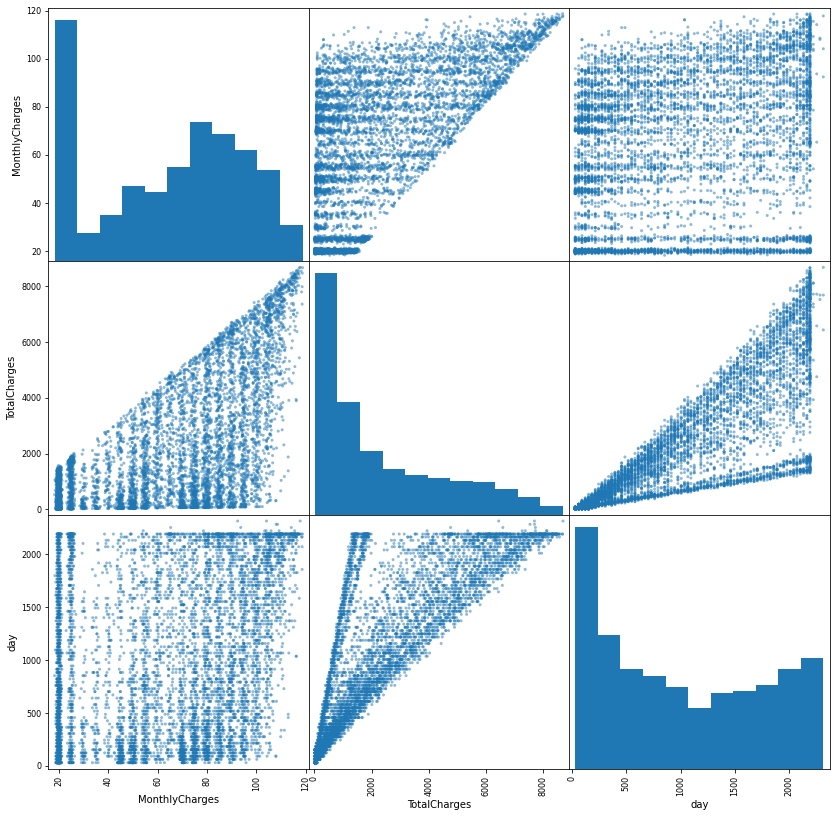

In [87]:
pd.plotting.scatter_matrix(df_all[numeric], figsize=(14,14), hist_kwds={'bins':11});

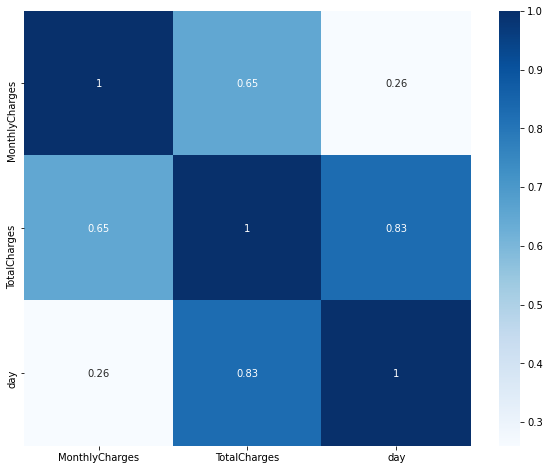

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(df_all[numeric].corr(), annot=True, cmap='Blues');

<div class="alert alert-info"> <b> </b>     

    
Коэффициент корреляции между итоговыми сборами и кол-м дней контракта слишком большой (больше 0.8), эти признаки можно считать мультиколлинеарными.
   
   
</div>

### Выводы по анализу

<div class="alert alert-info"> <b> </b>     

    
- У клиентов при наличии иждивенцев отток НИЖЕ в 2 раза, чем у клиентов с их отсутствием.   
    
- Пожилые клиенты уходят в 2 раза чаще. 
    
- Высокий отток при договоре на месяц, почти в 4 раза меньше - при договоре на год, а на 2 года - в 20 раз меньше.    
    
- Услуга связанная с телефоном или ее отсутствие на первый взгляд не имеет значимого влияния на отток.    
    
- Подключение через телефонную линию (DSL) - отток 19%, через оптоволоконный кабель (Fiber optic) - 42%, при отсутствии интернета отток - 7,4%.    
    
- При подключенных услугах: Антивирус (*DeviceProtection*), блокировка небезопасных сайтов (*OnlineSecurity*), техническая поддержка (*TechSupport*), облачное хранилище файлов (*OnlineBackup*) - отток НИЖЕ, чем при отсутствии этих услуг.   
    
- Наличие ТВ и каталога фильмов отток увеличивает.  
    
- На отток влияет сборы. Чем выше ежемес.сбор - тем больше отток, и, наоборот, чем выше итоговый сбор, чем мень отток.    

- Телефония (отсутствие/наличие) не влияет на отток.
    
- Метод оплаты и способ выставления счетов также влияет на отток.
   
</div>

## Кодирование категориальных признаков и удаление лишних столбцов

In [89]:
df_all.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'exited',
       'current_date', 'day', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines'],
      dtype='object')

In [90]:
category = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'] 

In [91]:
def one_hot(df, columns):    
    dummies = pd.get_dummies(df[columns], drop_first=True)
    df[dummies.columns] = dummies
    return df

In [92]:
def drop_columns(df, columns):
    return df.drop(columns, axis=1)

drop_col = ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines', 'current_date']

In [93]:
df = (
    df_all
    .pipe(one_hot, category)
    .pipe(drop_columns, drop_col)
)
df.head()

,MonthlyCharges,TotalCharges,exited,day,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,29.85,29.85,0,31,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,56.95,1889.50,0,1036,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,123,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,42.30,1840.75,0,1371,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,70.70,151.65,1,153,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


## Разбиение на выборки

In [94]:
X = df.drop(['exited'], axis=1)
y = df['exited']
features_train_valid, features_test, target_train_valid, target_test = train_test_split(X, y, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=12345)


## Балансировка классов

In [95]:
df_train = features_train.copy()
df_train['Exited'] = target_train
df_loyal =  df_train[df_train['Exited']==0]
df_exited = df_train[df_train['Exited']==1]

df_exited_oversampled = resample(df_exited, replace=True, n_samples=len(df_loyal), random_state=12345)
df_train_oversampled = pd.concat([df_loyal, df_exited_oversampled])

df_train_oversampled['Exited'].value_counts()

0    3110
1    3110
Name: Exited, dtype: int64

In [96]:
features_train_oversampled = df_train_oversampled.drop(['Exited'], axis=1)
target_train_oversampled = df_train_oversampled['Exited']

## Предварительное исследование моделей

In [97]:
def train(model, X, y):
    model_instance = None      
    #numeric = ['MonthlyCharges', 'day'] 
    
    if model == LogisticRegression:
        model_instance = model(random_state=123, solver='lbfgs')
    elif model == RandomForestClassifier:
        model_instance = model(random_state=123, n_estimators=100)
    elif model == CatBoostClassifier:
        model_instance = model(random_state=123, verbose=0)
    else:
        model_instance = model(random_state=123)

    # Проведем стандартизацию признаков:
    scaler = StandardScaler()
    scaler.fit(X[numeric])
    X[numeric] = scaler.transform(X[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])

    # Обучим модель:
    model_instance.fit(X, y)
        
    # Вычислим интересующие нас метрики:
    predictions_valid = model_instance.predict(features_valid)
    probabilities_valid = model_instance.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid)
    precision=precision_score(target_valid, predictions_valid)
    recall=recall_score(target_valid, predictions_valid)    
    cmatrix = confusion_matrix(target_valid, predictions_valid)
    
    stat = pd.Series([type(model_instance).__name__, f1, roc_auc, precision, recall], index=['Model', 'F1', 'ROC_AUC', 'precision', 'recall'])
    return stat, cmatrix

In [98]:
model_list = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, lgb.LGBMClassifier, CatBoostClassifier]
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[], 'precision':[], 'recall':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train(model, features_train, target_train)
    stats = stats.append(stat, ignore_index=True)
    cmatrices.append(cmatrix)

100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


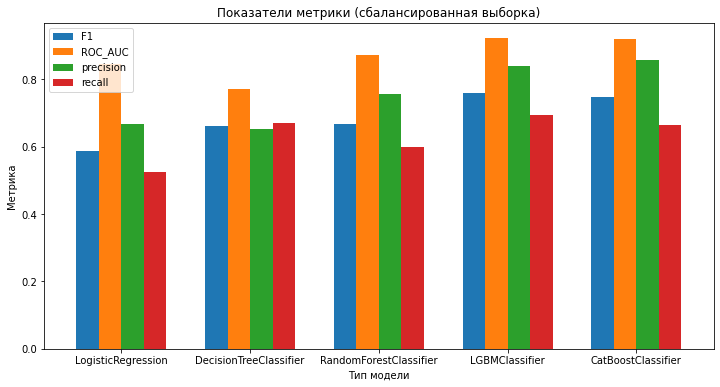

In [99]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (сбалансированная выборка)');


In [100]:
stats

,Model,F1,ROC_AUC,precision,recall
0,LogisticRegression,0.588757,0.844404,0.667785,0.526455
1,DecisionTreeClassifier,0.662321,0.770381,0.652956,0.671958
2,RandomForestClassifier,0.667651,0.873067,0.755853,0.597884
3,LGBMClassifier,0.761216,0.922581,0.840256,0.695767
4,CatBoostClassifier,0.748137,0.920866,0.856655,0.664021


In [101]:
def visualize_matrices(matrices):
    fig, axes = plt.subplots(3, 2, figsize=(10,13), constrained_layout=True)
    axes[2,1].set_axis_off()
    for cmatrix, ax, i in zip(cmatrices, axes.flat, range(6)):
        sns.heatmap(cmatrix, annot=True, ax=ax, cmap='Blues', fmt='d').set(title=stats.loc[i, 'Model'], xlabel='Предсказания', ylabel='Правильные ответы')

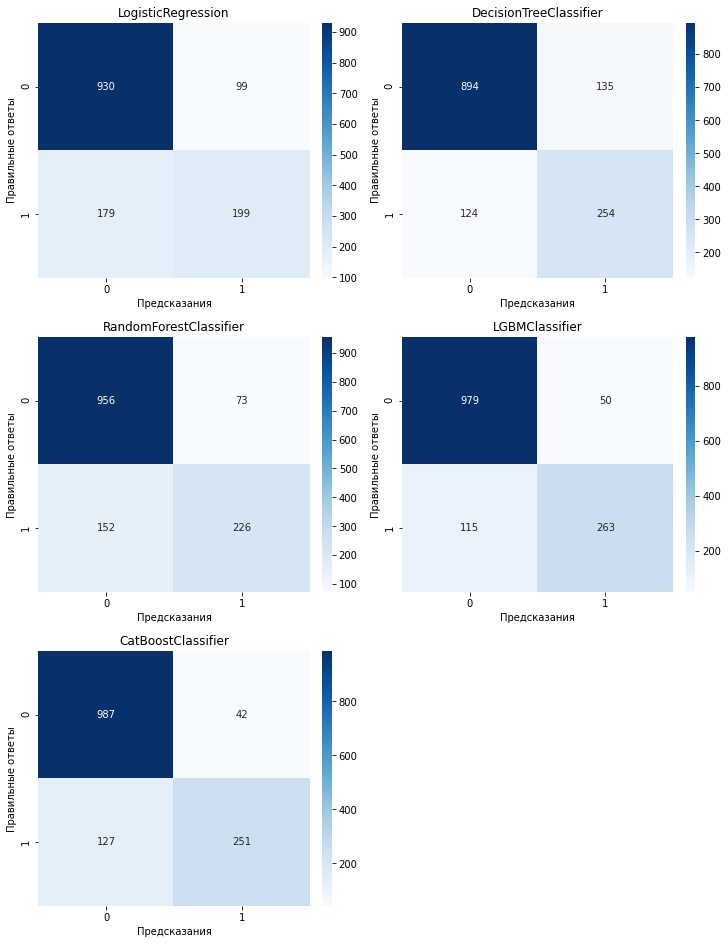

In [102]:
visualize_matrices(cmatrices)

<div class="alert alert-info"> <b> </b>   
    
Положительный класс предсказывается плохо, практически с 50% вероятностью, что соответствует случайности.
    
Настроим гиперпараметры каждой модели.    
    
</div>

## Настройка гиперпараметров

#### Логист.регрессия, случайный лес, дерево решений

In [103]:
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

In [104]:
param_range = [10, 15] #9, 10
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': [1.0, 0.5],
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_dt = [{'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]



In [105]:
%%time
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='f1',   #accuracy
            cv=10) 



RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='f1',   
            cv=10, 
            n_jobs=jobs)

DT = GridSearchCV(estimator=pipe_dt,
            param_grid=grid_params_dt,
            scoring='f1',   
            cv=10, 
            n_jobs=jobs)



# List of pipelines for iterating through each of them
grids = [LR, RF, DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
             2: 'Decision Tree'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(features_train_oversampled, target_train_oversampled)
    print('Best params are : %s' % gs.best_params_)
    # Best training data f1
    print('Best training f1: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(features_valid)
    # Test data f1 of model with best params
    print('Valid set f1 score for best params: %.3f ' % f1_score(target_valid, y_pred))
    # Track best (highest test f1) model
    if f1_score(target_valid, y_pred) > best_f1:
        best_f1 = f1_score(target_valid, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set f1: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training f1: 0.772
Valid set f1 score for best params: 0.601 

Estimator: Random Forest
Best params are : {'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__min_samples_split': 15}
Best training f1: 0.883
Valid set f1 score for best params: 0.000 

Estimator: Decision Tree
Best params are : {'clf__max_depth': 15, 'clf__min_samples_split': 15}
Best training f1: 0.886
Valid set f1 score for best params: 0.000 

Classifier with best test set f1: Logistic Regression
CPU times: user 20.6 s, sys: 3.69 s, total: 24.3 s
Wall time: 24.6 s


In [106]:
best_logistic = LogisticRegression(C= 0.5, penalty= 'l1', solver='liblinear', random_state=12345)
best_tree = DecisionTreeClassifier(max_depth= 15, min_samples_split= 15, random_state=12345)
best_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_split= 15, random_state=12345)

#### LightGBM

In [107]:
%%time

def lgbm_reg(trial):        
    
    params={'verbosity':-1,
    'lambda_l2': trial.suggest_float('lambda_l2', 0.1, 1), 
    'max_depth': trial.suggest_int('max_depth', 5, 100, step=0.05),
    'num_leaves': trial.suggest_int('num_leaves', 5, 105, step=10),
    'Learning_rate' : trial.suggest_float('learning_rate',0.001, 0.1, step=0.01),
    'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 0.8 , step=0.1)        
           }
        
    LGBMClas = lgb.LGBMClassifier(**params, random_state=12345)                           

    LGBMClas.fit(features_train_oversampled, target_train_oversampled) 

    y_pr = LGBMClas.predict(features_valid)

    f1 = f1_score(target_valid, y_pr)  
            
    return f1

study = optuna.create_study()
study.optimize(lgbm_reg, n_trials=10)

[I 2022-04-07 21:05:19,305] A new study created in memory with name: no-name-8e8a2ff5-7574-4d87-b504-71233eb3644d


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.22599037077123077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22599037077123077
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


[I 2022-04-07 21:05:21,192] Trial 0 finished with value: 0.0 and parameters: {'lambda_l2': 0.22599037077123077, 'max_depth': 43, 'num_leaves': 75, 'learning_rate': 0.081, 'bagging_fraction': 0.5}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.21933559242628703, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21933559242628703
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-04-07 21:05:21,798] Trial 1 finished with value: 0.0 and parameters: {'lambda_l2': 0.21933559242628703, 'max_depth': 80, 'num_leaves': 15, 'learning_rate': 0.07100000000000001, 'bagging_fraction': 0.7}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.7413210623114243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7413210623114243
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-04-07 21:05:24,084] Trial 2 finished with value: 0.0 and parameters: {'lambda_l2': 0.7413210623114243, 'max_depth': 62, 'num_leaves': 85, 'learning_rate': 0.031, 'bagging_fraction': 0.8}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.31530048674796707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31530048674796707
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-04-07 21:05:25,291] Trial 3 finished with value: 0.0 and parameters: {'lambda_l2': 0.31530048674796707, 'max_depth': 14, 'num_leaves': 45, 'learning_rate': 0.07100000000000001, 'bagging_fraction': 0.7}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.6718998434960665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6718998434960665
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-04-07 21:05:25,892] Trial 4 finished with value: 0.0 and parameters: {'lambda_l2': 0.6718998434960665, 'max_depth': 96, 'num_leaves': 15, 'learning_rate': 0.001, 'bagging_fraction': 0.7}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.1930312484210251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1930312484210251
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-04-07 21:05:26,981] Trial 5 finished with value: 0.0 and parameters: {'lambda_l2': 0.1930312484210251, 'max_depth': 10, 'num_leaves': 35, 'learning_rate': 0.07100000000000001, 'bagging_fraction': 0.7}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.2746168538870624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2746168538870624
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-04-07 21:05:27,987] Trial 6 finished with value: 0.0 and parameters: {'lambda_l2': 0.2746168538870624, 'max_depth': 62, 'num_leaves': 35, 'learning_rate': 0.051000000000000004, 'bagging_fraction': 0.6}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.5667060810746317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5667060810746317
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-04-07 21:05:28,589] Trial 7 finished with value: 0.0 and parameters: {'lambda_l2': 0.5667060810746317, 'max_depth': 59, 'num_leaves': 15, 'learning_rate': 0.001, 'bagging_fraction': 0.8}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.2844555475575094, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2844555475575094
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-04-07 21:05:30,489] Trial 8 finished with value: 0.0 and parameters: {'lambda_l2': 0.2844555475575094, 'max_depth': 42, 'num_leaves': 75, 'learning_rate': 0.051000000000000004, 'bagging_fraction': 0.8}. Best is trial 0 with value: 0.0.


[LightGBM] [Warning] Unknown parameter: Learning_rate
[LightGBM] [Warning] lambda_l2 is set=0.910186546787364, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.910186546787364
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-04-07 21:05:32,081] Trial 9 finished with value: 0.0 and parameters: {'lambda_l2': 0.910186546787364, 'max_depth': 49, 'num_leaves': 55, 'learning_rate': 0.081, 'bagging_fraction': 0.7}. Best is trial 0 with value: 0.0.


CPU times: user 12.3 s, sys: 183 ms, total: 12.5 s
Wall time: 12.8 s


In [108]:
study.best_params

{'lambda_l2': 0.22599037077123077,
 'max_depth': 43,
 'num_leaves': 75,
 'learning_rate': 0.081,
 'bagging_fraction': 0.5}

In [109]:
#записываем модель с лучшими параметрами
best_lgbm=lgb.LGBMClassifier(**study.best_params)
best_lgbm

LGBMClassifier(bagging_fraction=0.5, lambda_l2=0.22599037077123077,
               learning_rate=0.081, max_depth=43, num_leaves=75)

#### CatBoost

In [110]:
%%time

def cat(trial):        

    params= {
               'loss_function' : trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),
               'max_depth' : trial.suggest_int('max_depth', 4, 10, step=1)
             }
        
    catClas = CatBoostClassifier(**params, random_state=12345)                           

    catClas.fit(features_train_oversampled, target_train_oversampled) 

    y_pr = catClas.predict(features_valid)

    f1 = f1_score(target_valid, y_pr)  
            
    return f1

study = optuna.create_study()
study.optimize(cat, n_trials=10)

[I 2022-04-07 21:05:32,104] A new study created in memory with name: no-name-5e9b4d7e-db63-4539-95da-7ee9eca9f1b4


0:	learn: 0.6778715	total: 4.98ms	remaining: 4.97s
1:	learn: 0.6643946	total: 9.03ms	remaining: 4.51s
2:	learn: 0.6517051	total: 12.9ms	remaining: 4.28s
3:	learn: 0.6369614	total: 16.5ms	remaining: 4.12s
4:	learn: 0.6224732	total: 19.9ms	remaining: 3.96s
5:	learn: 0.6102983	total: 23.4ms	remaining: 3.88s
6:	learn: 0.6014728	total: 26.9ms	remaining: 3.81s
7:	learn: 0.5929854	total: 30.5ms	remaining: 3.79s
8:	learn: 0.5829033	total: 34.4ms	remaining: 3.78s
9:	learn: 0.5751910	total: 37.9ms	remaining: 3.75s
10:	learn: 0.5674508	total: 41.4ms	remaining: 3.72s
11:	learn: 0.5581016	total: 44.9ms	remaining: 3.7s
12:	learn: 0.5504134	total: 48.4ms	remaining: 3.68s
13:	learn: 0.5435306	total: 52ms	remaining: 3.66s
14:	learn: 0.5355813	total: 55.7ms	remaining: 3.65s
15:	learn: 0.5291838	total: 59.3ms	remaining: 3.65s
16:	learn: 0.5234127	total: 62.8ms	remaining: 3.63s
17:	learn: 0.5184610	total: 66.4ms	remaining: 3.62s
18:	learn: 0.5132298	total: 70.2ms	remaining: 3.62s
19:	learn: 0.5096437	tota

[I 2022-04-07 21:05:37,369] Trial 0 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 7}. Best is trial 0 with value: 0.0.


0:	learn: 0.6751768	total: 19.6ms	remaining: 19.6s
1:	learn: 0.6573917	total: 37.6ms	remaining: 18.7s
2:	learn: 0.6404264	total: 54.6ms	remaining: 18.1s
3:	learn: 0.6246694	total: 72.1ms	remaining: 17.9s
4:	learn: 0.6098819	total: 88.7ms	remaining: 17.7s
5:	learn: 0.5955903	total: 105ms	remaining: 17.5s
6:	learn: 0.5834799	total: 123ms	remaining: 17.4s
7:	learn: 0.5713749	total: 140ms	remaining: 17.4s
8:	learn: 0.5606003	total: 158ms	remaining: 17.4s
9:	learn: 0.5495921	total: 175ms	remaining: 17.3s
10:	learn: 0.5421331	total: 192ms	remaining: 17.3s
11:	learn: 0.5327456	total: 209ms	remaining: 17.2s
12:	learn: 0.5258419	total: 228ms	remaining: 17.3s
13:	learn: 0.5177098	total: 245ms	remaining: 17.2s
14:	learn: 0.5090868	total: 262ms	remaining: 17.2s
15:	learn: 0.5028463	total: 279ms	remaining: 17.2s
16:	learn: 0.4962062	total: 296ms	remaining: 17.1s
17:	learn: 0.4893300	total: 314ms	remaining: 17.1s
18:	learn: 0.4833745	total: 332ms	remaining: 17.1s
19:	learn: 0.4760475	total: 349ms	re

[I 2022-04-07 21:05:57,085] Trial 1 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 10}. Best is trial 0 with value: 0.0.


0:	learn: 0.6808770	total: 1.97ms	remaining: 1.97s
1:	learn: 0.6674530	total: 4.09ms	remaining: 2.04s
2:	learn: 0.6561054	total: 6.2ms	remaining: 2.06s
3:	learn: 0.6464515	total: 8.04ms	remaining: 2s
4:	learn: 0.6352200	total: 10.1ms	remaining: 2.02s
5:	learn: 0.6222291	total: 12.2ms	remaining: 2.02s
6:	learn: 0.6131779	total: 14.2ms	remaining: 2.02s
7:	learn: 0.6049524	total: 16.4ms	remaining: 2.04s
8:	learn: 0.5973131	total: 18.3ms	remaining: 2.01s
9:	learn: 0.5890139	total: 20.3ms	remaining: 2.01s
10:	learn: 0.5826451	total: 22.4ms	remaining: 2.01s
11:	learn: 0.5760771	total: 24.4ms	remaining: 2.01s
12:	learn: 0.5702619	total: 26.2ms	remaining: 1.99s
13:	learn: 0.5647861	total: 28.2ms	remaining: 1.99s
14:	learn: 0.5566660	total: 30.2ms	remaining: 1.98s
15:	learn: 0.5519516	total: 32.2ms	remaining: 1.98s
16:	learn: 0.5470053	total: 34.2ms	remaining: 1.98s
17:	learn: 0.5410721	total: 36.4ms	remaining: 1.99s
18:	learn: 0.5370859	total: 38.5ms	remaining: 1.99s
19:	learn: 0.5316633	total

[I 2022-04-07 21:06:00,693] Trial 2 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 5}. Best is trial 0 with value: 0.0.


0:	learn: 0.6803257	total: 2.86ms	remaining: 2.86s
1:	learn: 0.6642657	total: 5.8ms	remaining: 2.89s
2:	learn: 0.6480010	total: 8.65ms	remaining: 2.88s
3:	learn: 0.6374279	total: 11.3ms	remaining: 2.82s
4:	learn: 0.6257732	total: 14.2ms	remaining: 2.82s
5:	learn: 0.6153859	total: 16.9ms	remaining: 2.79s
6:	learn: 0.6063553	total: 19.5ms	remaining: 2.76s
7:	learn: 0.5983790	total: 22.2ms	remaining: 2.75s
8:	learn: 0.5905509	total: 25.2ms	remaining: 2.77s
9:	learn: 0.5845633	total: 28.1ms	remaining: 2.78s
10:	learn: 0.5757939	total: 30.5ms	remaining: 2.74s
11:	learn: 0.5681484	total: 33.2ms	remaining: 2.73s
12:	learn: 0.5614187	total: 35.8ms	remaining: 2.72s
13:	learn: 0.5535747	total: 38.7ms	remaining: 2.72s
14:	learn: 0.5487557	total: 41.8ms	remaining: 2.75s
15:	learn: 0.5425702	total: 44.2ms	remaining: 2.72s
16:	learn: 0.5363453	total: 46.7ms	remaining: 2.7s
17:	learn: 0.5300479	total: 49.4ms	remaining: 2.7s
18:	learn: 0.5256505	total: 52.2ms	remaining: 2.69s
19:	learn: 0.5221208	tota

[I 2022-04-07 21:06:05,107] Trial 3 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 6}. Best is trial 0 with value: 0.0.


0:	learn: 0.6808770	total: 2.35ms	remaining: 2.35s
1:	learn: 0.6674530	total: 4.83ms	remaining: 2.41s
2:	learn: 0.6561054	total: 7.02ms	remaining: 2.33s
3:	learn: 0.6464515	total: 9.37ms	remaining: 2.33s
4:	learn: 0.6352200	total: 11.4ms	remaining: 2.27s
5:	learn: 0.6222291	total: 13.5ms	remaining: 2.23s
6:	learn: 0.6131779	total: 15.5ms	remaining: 2.21s
7:	learn: 0.6049524	total: 17.8ms	remaining: 2.21s
8:	learn: 0.5973131	total: 19.9ms	remaining: 2.19s
9:	learn: 0.5890139	total: 22.1ms	remaining: 2.19s
10:	learn: 0.5826451	total: 24.2ms	remaining: 2.18s
11:	learn: 0.5760771	total: 26.2ms	remaining: 2.16s
12:	learn: 0.5702619	total: 28.4ms	remaining: 2.15s
13:	learn: 0.5647861	total: 30.3ms	remaining: 2.13s
14:	learn: 0.5566660	total: 32.5ms	remaining: 2.14s
15:	learn: 0.5519516	total: 34.6ms	remaining: 2.13s
16:	learn: 0.5470053	total: 36.7ms	remaining: 2.12s
17:	learn: 0.5410721	total: 38.8ms	remaining: 2.12s
18:	learn: 0.5370859	total: 40.6ms	remaining: 2.1s
19:	learn: 0.5316633	to

[I 2022-04-07 21:06:08,706] Trial 4 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 5}. Best is trial 0 with value: 0.0.


0:	learn: 0.6816621	total: 1.53ms	remaining: 1.53s
1:	learn: 0.6705312	total: 3.28ms	remaining: 1.64s
2:	learn: 0.6596506	total: 4.98ms	remaining: 1.66s
3:	learn: 0.6498974	total: 6.64ms	remaining: 1.65s
4:	learn: 0.6385317	total: 8.32ms	remaining: 1.65s
5:	learn: 0.6294058	total: 9.88ms	remaining: 1.64s
6:	learn: 0.6218424	total: 11.5ms	remaining: 1.64s
7:	learn: 0.6143298	total: 13ms	remaining: 1.61s
8:	learn: 0.6076409	total: 14.9ms	remaining: 1.64s
9:	learn: 0.6006123	total: 16.4ms	remaining: 1.62s
10:	learn: 0.5924168	total: 18.1ms	remaining: 1.62s
11:	learn: 0.5866262	total: 19.7ms	remaining: 1.62s
12:	learn: 0.5794933	total: 21.4ms	remaining: 1.63s
13:	learn: 0.5750054	total: 23.2ms	remaining: 1.63s
14:	learn: 0.5699450	total: 24.8ms	remaining: 1.63s
15:	learn: 0.5653884	total: 26.4ms	remaining: 1.62s
16:	learn: 0.5607156	total: 28.1ms	remaining: 1.62s
17:	learn: 0.5564013	total: 29.7ms	remaining: 1.62s
18:	learn: 0.5527619	total: 31.1ms	remaining: 1.61s
19:	learn: 0.5488578	tot

[I 2022-04-07 21:06:12,040] Trial 5 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 4}. Best is trial 0 with value: 0.0.


Learning rate set to 0.022484
0:	learn: 0.6804248	total: 6.31ms	remaining: 6.31s
1:	learn: 0.6686041	total: 12.4ms	remaining: 6.18s
2:	learn: 0.6580412	total: 18.6ms	remaining: 6.17s
3:	learn: 0.6480302	total: 24.7ms	remaining: 6.14s
4:	learn: 0.6376206	total: 30.8ms	remaining: 6.13s
5:	learn: 0.6279111	total: 36.7ms	remaining: 6.07s
6:	learn: 0.6193734	total: 42.2ms	remaining: 5.99s
7:	learn: 0.6099248	total: 48.1ms	remaining: 5.96s
8:	learn: 0.6006124	total: 53.9ms	remaining: 5.93s
9:	learn: 0.5909771	total: 59.8ms	remaining: 5.92s
10:	learn: 0.5837002	total: 65.7ms	remaining: 5.91s
11:	learn: 0.5755300	total: 71.6ms	remaining: 5.89s
12:	learn: 0.5696960	total: 77.8ms	remaining: 5.91s
13:	learn: 0.5634348	total: 83.9ms	remaining: 5.91s
14:	learn: 0.5565104	total: 90.3ms	remaining: 5.93s
15:	learn: 0.5509411	total: 96.5ms	remaining: 5.93s
16:	learn: 0.5452034	total: 102ms	remaining: 5.92s
17:	learn: 0.5394150	total: 108ms	remaining: 5.91s
18:	learn: 0.5332885	total: 114ms	remaining: 5

[I 2022-04-07 21:06:19,530] Trial 6 finished with value: 0.0 and parameters: {'loss_function': 'Logloss', 'max_depth': 8}. Best is trial 0 with value: 0.0.


0:	learn: 0.6762833	total: 6.08ms	remaining: 6.08s
1:	learn: 0.6608928	total: 12ms	remaining: 5.99s
2:	learn: 0.6473809	total: 17.3ms	remaining: 5.75s
3:	learn: 0.6348335	total: 22.9ms	remaining: 5.7s
4:	learn: 0.6219846	total: 28.6ms	remaining: 5.69s
5:	learn: 0.6101079	total: 34.3ms	remaining: 5.67s
6:	learn: 0.5998861	total: 39.9ms	remaining: 5.66s
7:	learn: 0.5885398	total: 45.5ms	remaining: 5.65s
8:	learn: 0.5781906	total: 50.9ms	remaining: 5.6s
9:	learn: 0.5669443	total: 56.4ms	remaining: 5.58s
10:	learn: 0.5592179	total: 62ms	remaining: 5.58s
11:	learn: 0.5499248	total: 67.7ms	remaining: 5.57s
12:	learn: 0.5434862	total: 73.4ms	remaining: 5.58s
13:	learn: 0.5366829	total: 79.5ms	remaining: 5.6s
14:	learn: 0.5292254	total: 85.1ms	remaining: 5.59s
15:	learn: 0.5228203	total: 90.8ms	remaining: 5.58s
16:	learn: 0.5169630	total: 96.6ms	remaining: 5.58s
17:	learn: 0.5121885	total: 102ms	remaining: 5.57s
18:	learn: 0.5059259	total: 108ms	remaining: 5.57s
19:	learn: 0.4996690	total: 113

[I 2022-04-07 21:06:27,022] Trial 7 finished with value: 0.0 and parameters: {'loss_function': 'CrossEntropy', 'max_depth': 8}. Best is trial 0 with value: 0.0.


Learning rate set to 0.022484
0:	learn: 0.6844956	total: 1.51ms	remaining: 1.51s
1:	learn: 0.6759629	total: 3.37ms	remaining: 1.68s
2:	learn: 0.6674736	total: 5.02ms	remaining: 1.67s
3:	learn: 0.6590800	total: 6.5ms	remaining: 1.62s
4:	learn: 0.6527168	total: 8.41ms	remaining: 1.67s
5:	learn: 0.6460971	total: 9.94ms	remaining: 1.65s
6:	learn: 0.6387343	total: 11.6ms	remaining: 1.64s
7:	learn: 0.6311816	total: 13ms	remaining: 1.61s
8:	learn: 0.6254709	total: 14.6ms	remaining: 1.61s
9:	learn: 0.6191941	total: 16.1ms	remaining: 1.59s
10:	learn: 0.6127647	total: 17.7ms	remaining: 1.59s
11:	learn: 0.6075387	total: 19.3ms	remaining: 1.58s
12:	learn: 0.6021976	total: 20.9ms	remaining: 1.58s
13:	learn: 0.5980740	total: 22.5ms	remaining: 1.58s
14:	learn: 0.5931517	total: 24ms	remaining: 1.57s
15:	learn: 0.5890577	total: 25.5ms	remaining: 1.57s
16:	learn: 0.5850936	total: 27.2ms	remaining: 1.57s
17:	learn: 0.5812143	total: 28.5ms	remaining: 1.55s
18:	learn: 0.5759092	total: 30.1ms	remaining: 1.5

[I 2022-04-07 21:06:30,389] Trial 8 finished with value: 0.0 and parameters: {'loss_function': 'Logloss', 'max_depth': 4}. Best is trial 0 with value: 0.0.


Learning rate set to 0.022484
0:	learn: 0.6804248	total: 6.34ms	remaining: 6.33s
1:	learn: 0.6686041	total: 12.3ms	remaining: 6.13s
2:	learn: 0.6580412	total: 18.3ms	remaining: 6.08s
3:	learn: 0.6480302	total: 24.1ms	remaining: 5.99s
4:	learn: 0.6376206	total: 29.9ms	remaining: 5.95s
5:	learn: 0.6279111	total: 35.6ms	remaining: 5.89s
6:	learn: 0.6193734	total: 41.7ms	remaining: 5.91s
7:	learn: 0.6099248	total: 47.5ms	remaining: 5.89s
8:	learn: 0.6006124	total: 53.1ms	remaining: 5.84s
9:	learn: 0.5909771	total: 59.1ms	remaining: 5.85s
10:	learn: 0.5837002	total: 65ms	remaining: 5.84s
11:	learn: 0.5755300	total: 70.8ms	remaining: 5.83s
12:	learn: 0.5696960	total: 76.7ms	remaining: 5.82s
13:	learn: 0.5634348	total: 82.3ms	remaining: 5.79s
14:	learn: 0.5565104	total: 88.3ms	remaining: 5.8s
15:	learn: 0.5509411	total: 94.4ms	remaining: 5.8s
16:	learn: 0.5452034	total: 100ms	remaining: 5.81s
17:	learn: 0.5394150	total: 107ms	remaining: 5.81s
18:	learn: 0.5332885	total: 113ms	remaining: 5.81s

[I 2022-04-07 21:06:38,151] Trial 9 finished with value: 0.0 and parameters: {'loss_function': 'Logloss', 'max_depth': 8}. Best is trial 0 with value: 0.0.


CPU times: user 50.4 s, sys: 1.67 s, total: 52 s
Wall time: 1min 6s


In [111]:
study.best_params

{'loss_function': 'CrossEntropy', 'max_depth': 7}

In [112]:
#записываем модель с лучшими параметрами
best_cat=CatBoostClassifier(**study.best_params)
best_cat

## Тестирование

<div class="alert alert-info"> <b> </b>   
    
Обучим настроенные модели на трейн и валид выборке, а затем проверим на тестовой.    
    
</div>

In [113]:
df_train_valid = features_train_valid.copy()
df_train_valid['Exited'] = target_train_valid
df_loyal =  df_train_valid[df_train_valid['Exited']==0]
df_exited = df_train_valid[df_train_valid['Exited']==1]

df_exited_oversampled = resample(df_exited, replace=True, n_samples=len(df_loyal), random_state=12345)
df_train_oversampled = pd.concat([df_loyal, df_exited_oversampled])

df_train_oversampled['Exited'].value_counts()

0    4139
1    4139
Name: Exited, dtype: int64

In [114]:
features_train_valid_oversampled = df_train_oversampled.drop(['Exited'], axis=1)
target_train_valid_oversampled = df_train_oversampled['Exited']

In [115]:
def train(model, X, y):
    model_instance = None        
    #numeric = ['MonthlyCharges', 'day'] #'MonthlyCharges', 
    
    if model == LogisticRegression:
        model_instance = model(C= 0.5, penalty= 'l1', solver='liblinear', random_state=12345)
    elif model == DecisionTreeClassifier:
        model_instance = model(max_depth= 15, min_samples_split= 15, random_state=12345)    
    elif model == RandomForestClassifier:
        model_instance = model(criterion= 'entropy', max_depth= 15, min_samples_split= 15, random_state=12345)
    elif model == CatBoostClassifier:
        #model_instance = model(loss_function= 'CrossEntropy', max_depth= 6)
        model_instance = best_cat
    elif model == lgb.LGBMClassifier:
        #model_instance = model(lambda_l2= 0.20134520420117144, max_depth= 73, num_leaves= 25, learning_rate= 0.011, bagging_fraction= 0.8)
        model_instance = best_lgbm

    # Проведем стандартизацию признаков:
    scaler = StandardScaler()
    scaler.fit(X[numeric])
    X[numeric] = scaler.transform(X[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric]) 


    # Обучим модель:
    model_instance.fit(X, y)
        
    # Вычислим интересующие нас метрики:
    predictions_test = model_instance.predict(features_test)
    probabilities_test = model_instance.predict_proba(features_test)[:, 1]
    
    f1 = f1_score(target_test, predictions_test)
    roc_auc = roc_auc_score(target_test, probabilities_test)    
    precision=precision_score(target_test, predictions_test)
    recall=recall_score(target_test, predictions_test)
    
    cmatrix = confusion_matrix(target_test, predictions_test)
    
    stat = pd.Series([type(model_instance).__name__, f1, roc_auc, precision, recall], index=['Model', 'F1', 'ROC_AUC', 'precision', 'recall'])
    return stat, cmatrix

In [116]:
model_list = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, CatBoostClassifier, lgb.LGBMClassifier]
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[], 'precision':[], 'recall':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train(model, features_train_valid_oversampled, target_train_valid_oversampled)
    stats = stats.append(stat, ignore_index=True)
    cmatrices.append(cmatrix)

 60%|██████    | 3/5 [00:00<00:00,  2.72it/s]

0:	learn: 0.6783404	total: 3.59ms	remaining: 3.58s
1:	learn: 0.6631254	total: 7.92ms	remaining: 3.95s
2:	learn: 0.6494359	total: 11.8ms	remaining: 3.94s
3:	learn: 0.6368455	total: 15.6ms	remaining: 3.88s
4:	learn: 0.6257300	total: 19.3ms	remaining: 3.83s
5:	learn: 0.6158123	total: 23.2ms	remaining: 3.84s
6:	learn: 0.6027693	total: 27.2ms	remaining: 3.85s
7:	learn: 0.5925955	total: 31.1ms	remaining: 3.85s
8:	learn: 0.5846883	total: 35.4ms	remaining: 3.9s
9:	learn: 0.5747434	total: 39.7ms	remaining: 3.93s
10:	learn: 0.5674798	total: 43.9ms	remaining: 3.95s
11:	learn: 0.5606824	total: 47.8ms	remaining: 3.94s
12:	learn: 0.5518999	total: 52ms	remaining: 3.95s
13:	learn: 0.5465995	total: 56.2ms	remaining: 3.96s
14:	learn: 0.5410392	total: 60ms	remaining: 3.94s
15:	learn: 0.5359783	total: 63.7ms	remaining: 3.92s
16:	learn: 0.5320770	total: 68.1ms	remaining: 3.94s
17:	learn: 0.5263947	total: 72.6ms	remaining: 3.96s
18:	learn: 0.5220956	total: 76.9ms	remaining: 3.97s
19:	learn: 0.5170557	total:

 80%|████████  | 4/5 [00:06<00:02,  2.54s/it]

[LightGBM] [Warning] lambda_l2 is set=0.22599037077123077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22599037077123077
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


100%|██████████| 5/5 [00:08<00:00,  1.80s/it]


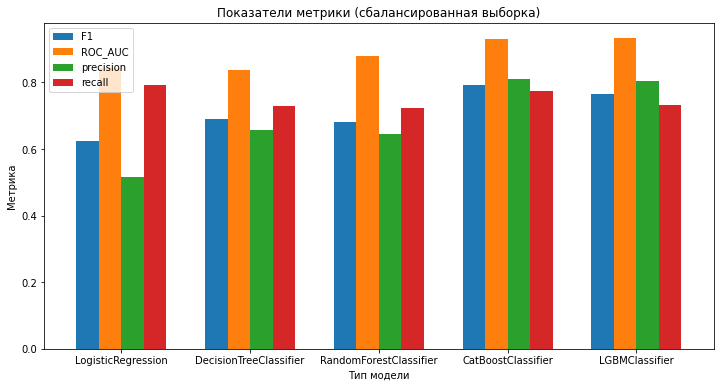

In [117]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (сбалансированная выборка)');


In [118]:
stats

,Model,F1,ROC_AUC,precision,recall
0,LogisticRegression,0.625387,0.842455,0.517065,0.791123
1,DecisionTreeClassifier,0.691450,0.836913,0.658019,0.728460
2,RandomForestClassifier,0.681427,0.878961,0.644186,0.723238
3,CatBoostClassifier,0.792000,0.930792,0.809264,0.775457
4,LGBMClassifier,0.766074,0.932742,0.804598,0.731070


In [119]:
def visualize_matrices(matrices):
    fig, axes = plt.subplots(3, 2, figsize=(10,13), constrained_layout=True)
    axes[2,1].set_axis_off()
    for cmatrix, ax, i in zip(cmatrices, axes.flat, range(6)):
        sns.heatmap(cmatrix, annot=True, ax=ax, cmap='Blues', fmt='d').set(title=stats.loc[i, 'Model'], xlabel='Предсказания', ylabel='Правильные ответы')

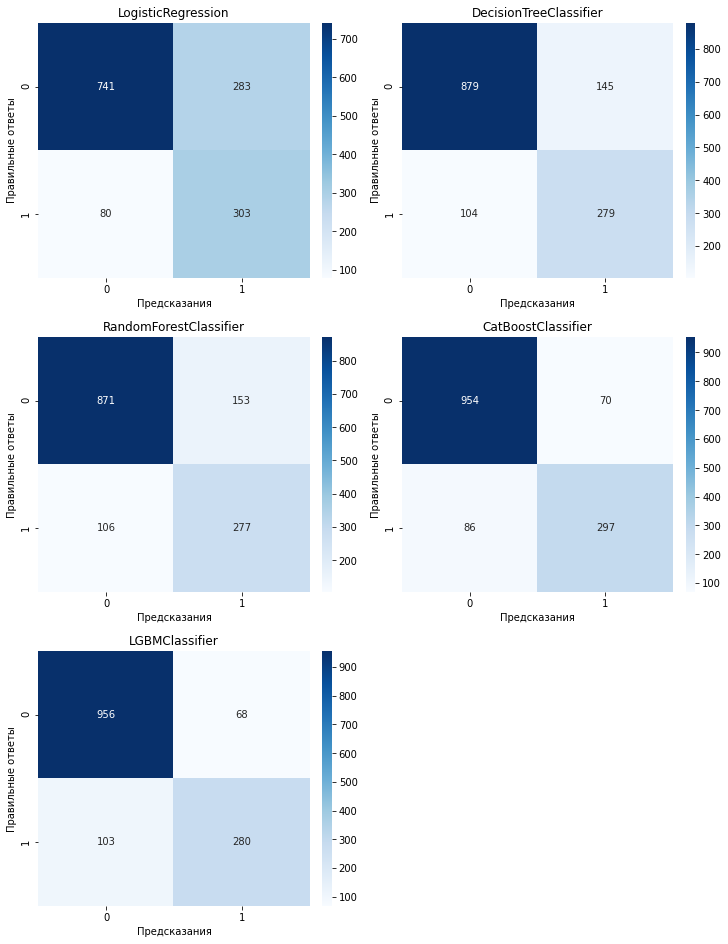

In [120]:
visualize_matrices(cmatrices)

<div class="alert alert-info"> <b> </b>   
    
Две модели, которые выбились вперед по качеству -LightGBM и CatBoost. 
    
У первой модели лучше полнота, у второй- точность.
    
Признаки в наибольшей степени важные в обоих моделях - сборы месячные и общие, количество дней контракта. 
    
**ROC-AUC обоих моделей - 0,93**  
            
</div>

## Влияние признаков

In [121]:
pd.DataFrame(
    data={'feature': features_test.columns, 'importance': best_lgbm.feature_importances_}
).sort_values(by = 'importance', ascending = False)

,feature,importance
1,TotalCharges,2253
2,day,1990
0,MonthlyCharges,1912
11,Dependents_Yes,114
6,PaperlessBilling_Yes,104
10,Partner_Yes,101
15,OnlineBackup_Yes,89
4,Type_One year,88
8,PaymentMethod_Electronic check,86
3,SeniorCitizen,79


In [122]:
pd.DataFrame(
    data={'feature': features_test.columns, 'importance': best_cat.feature_importances_}
).sort_values(by = 'importance', ascending = False)

,feature,importance
1,TotalCharges,28.223825
2,day,26.336280
0,MonthlyCharges,14.732090
5,Type_Two year,4.449356
12,InternetService_Fiber optic,2.720040
4,Type_One year,2.575771
13,InternetService_No,1.986117
8,PaymentMethod_Electronic check,1.984117
6,PaperlessBilling_Yes,1.956366
19,StreamingMovies_Yes,1.825314


## Отчет

<div style="background: #310062; padding: 5px; border: 1px solid blue; border-radius: 5px;">
    <font color='white'> <b><u>ОТЧЕТ</u></b>
</font>
<font color='white'><br>
Выполнила все пункты, а именно:<br>
Проанализировала признаки и удалила лишние<br> 
Предварительно проверила модели, настроила гиперпараметры и протестировала<br>

Ключевые шаги:<br>   
1) Подготовила данные к анализу, привела к нужному типу, добавила новый признак - количество дней договора, объединила датасеты, выделила целевую переменную.
    
2) Проанализировала факторы влияния на целевую переменную:<br>
- Графическим методом - влияние каждого признака на отток.<br>
- Проверила гипотезы (стьюдент, маннауитни).<br>
- Корреляция численных признаков<br>
- Кодировала категориальные признаки<br>
- Сбалансировала классы<br>
    
3) Алгоритм нахождения модели:<br>
- Предварительно исследовала модели и посмотрела метрики качества<br>
- Настроила гиперпараметры<br>
- Протестировала модели с лучшими параметрами<br>
 
4) Рассчитала метрики - F1, ROC_AUC, precision, recall.<br>

5) Две модели, которые выбились вперед по качеству -LightGBM и CatBoost.<br>
- Признаки в наибольшей степени важные в обоих моделях - сборы месячные и общие, количество дней контракта.<br> 
- У первой модели лучше полнота, у второй- точность.<br>      
- **ROC-AUC обоих моделей - 0,93** <br>
